# Time-series Forecasting

## Description
The data consists of 52,416 observations of energy consumption on a 10-minute window. Every observation is described by the following feature columns.

Your task is to **aggregate the observations on an interval of 38 minutes**. For this time interval, using the values of the **9 previous time intervals**, forecast the target value one step in the future. Choose which features you are going to use.

**You must train an LSTM network.**



Features:

* TimePeriod: Time window of ten minutes.
* WT: Weather Temperature.
* WH: Weather Humidity.
* WS: Wind Speed.
* GDF: General Diffuse Flow. “Diffuse flow” is a catchall term to describe low-temperature (< 0.2° to ~ 100°C) fluids that slowly discharge through sulfide mounds, fractured lava flows, and assemblages of bacterial mats and macrofauna.
* DF: DiffuseFlows

Target:

Consumption

## Dateset links:
 * [DS1](https://drive.google.com/file/d/1-8neeIpiq6yzWVw4EG_WgzHX4kPH1n1j/view?usp=sharing)
 * [DS2](https://drive.google.com/file/d/1-LhrUaH59q8O0SYB8WE-Eov2gaTMQYVx/view?usp=sharing)

## Read the datasets

In [83]:
import pandas as pd
features_df = pd.read_csv("power_consumption_g2_feat.csv")
features_df


,TimePeriod,WT,WH,WS,GDF,DF
0,2017-03-01 16:40:00,21.33,55.91,0.080,387.400,427.300
1,2017-07-27 06:30:00,23.10,48.58,4.908,10.450,8.630
2,2017-10-11 19:00:00,23.10,59.82,0.084,0.446,0.322
3,2017-02-10 06:50:00,12.25,80.80,4.916,0.051,0.111
4,2017-03-06 16:00:00,15.62,59.38,0.075,533.400,579.900
...,...,...,...,...,...,...
52411,2017-05-14 02:20:00,23.58,43.10,0.075,0.110,0.122
52412,2017-11-17 19:20:00,17.30,76.50,0.075,0.040,0.148
52413,2017-03-21 12:10:00,17.90,50.28,0.081,837.000,296.700
52414,2017-07-28 05:10:00,25.23,61.32,4.907,0.091,0.119


In [84]:
features_df["TimePeriod"] = pd.to_datetime(features_df["TimePeriod"])
features_df.set_index(keys=["TimePeriod"], inplace=True)
features_df.sort_index(inplace=True)
features_df

,WT,WH,WS,GDF,DF
TimePeriod,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085
...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,NaN,0.096
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074


In [85]:
target_df = pd.read_csv("power_consumption_g2.csv")
target_df

,TimePeriod,Consumption
0,2017-12-02 20:10:00,36824.33460
1,2017-12-25 15:30:00,31841.82510
2,2017-05-19 21:10:00,44909.11475
3,2017-05-28 04:50:00,22964.45902
4,2017-05-08 16:10:00,33829.77049
...,...,...
52411,2017-10-01 23:50:00,31138.03063
52412,2017-12-07 17:40:00,40091.25475
52413,2017-09-11 18:30:00,38930.97345
52414,2017-04-16 04:50:00,23734.42411


In [86]:
target_df["TimePeriod"] = pd.to_datetime(target_df["TimePeriod"])
target_df.set_index(keys=["TimePeriod"], inplace=True)
target_df.sort_index(inplace=True)
target_df

,Consumption
TimePeriod,
2017-01-01 00:00:00,34055.69620
2017-01-01 00:10:00,29814.68354
2017-01-01 00:20:00,29128.10127
2017-01-01 00:30:00,28228.86076
2017-01-01 00:40:00,27335.69620
...,...
2017-12-30 23:10:00,31160.45627
2017-12-30 23:20:00,30430.41825
2017-12-30 23:30:00,29590.87452


## Merge the datasets (and pre-process if needed)

In [88]:
df = pd.merge(left=features_df, right=target_df, right_index=True, left_index=True)
df

,WT,WH,WS,GDF,DF,Consumption
TimePeriod,,,,,,
2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620
2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354
2017-01-01 00:20:00,6.313,74.5,0.080,0.062,0.100,29128.10127
2017-01-01 00:30:00,6.121,75.0,0.083,0.091,0.096,28228.86076
2017-01-01 00:40:00,5.921,75.7,0.081,0.048,0.085,27335.69620
...,...,...,...,...,...,...
2017-12-30 23:10:00,7.010,72.4,0.080,NaN,0.096,31160.45627
2017-12-30 23:20:00,6.947,72.6,0.082,0.051,0.093,30430.41825
2017-12-30 23:30:00,6.900,72.8,0.086,0.084,0.074,29590.87452


In [89]:
df.isnull().sum()

WT             559
WH             499
WS             529
GDF            524
DF             505
Consumption      0
dtype: int64

## Group the datasets into time intervals of 1 hour

In [91]:
df.columns

Index(['WT', 'WH', 'WS', 'GDF', 'DF', 'Consumption'], dtype='object')

In [92]:
features = ['WT', 'WH', 'WS', 'GDF', 'DF']
target = 'Consumption'

In [93]:
for feature in features:
    df[feature] = df[feature].interpolate(method = 'linear')

In [94]:
df = df.groupby(pd.Grouper(freq="2h")).mean()

## Create lags

In [96]:
lags = range(9, 0, -1)
for lag in lags:
    for column in features + [target]:
        df[f"{column}_{lag}"] = df[column].shift(lag)
df.drop(columns=features, inplace=True)
df.dropna(axis=0, inplace=True)
df

,Consumption,WT_9,WH_9,WS_9,GDF_9,DF_9,Consumption_9,WT_8,WH_8,WS_8,...,WS_2,GDF_2,DF_2,Consumption_2,WT_1,WH_1,WS_1,GDF_1,DF_1,Consumption_1
TimePeriod,,,,,,,,,,,,,,,,,,,,,
2017-01-01 18:00:00,39969.113924,5.866833,76.300000,0.081917,0.060167,0.105667,26927.594937,5.029333,78.008333,0.082583,...,0.075667,377.458333,48.125000,29558.481012,15.309167,59.112500,0.077250,160.075833,169.773333,31576.708860
2017-01-01 20:00:00,39542.278480,5.029333,78.008333,0.082583,0.061417,0.135083,21447.088607,4.919667,74.641667,0.081667,...,0.077250,160.075833,169.773333,31576.708860,12.911667,67.740833,0.077417,2.432750,2.487417,39969.113924
2017-01-01 22:00:00,32522.531644,4.919667,74.641667,0.081667,0.061917,0.120833,20641.518987,4.512750,74.575000,0.082417,...,0.077417,2.432750,2.487417,39969.113924,11.725417,70.855000,0.076250,0.060333,0.097083,39542.278480
2017-01-02 00:00:00,23907.848100,4.512750,74.575000,0.082417,0.063583,0.122500,20094.683545,4.632167,73.791667,0.082417,...,0.076250,0.060333,0.097083,39542.278480,12.251667,69.309583,0.074667,0.066333,0.108333,32522.531644
2017-01-02 02:00:00,20521.518986,4.632167,73.791667,0.082417,79.281917,15.761833,21255.189872,8.019333,63.835833,2.913333,...,0.074667,0.066333,0.108333,32522.531644,10.685000,78.475000,0.076417,0.068583,0.139583,23907.848100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-30 14:00:00,29293.789606,13.562500,51.010000,0.077667,0.060833,0.106000,37362.737643,13.351667,53.502500,0.077500,...,0.077000,353.441667,36.275833,29649.683142,14.399167,38.129167,0.077667,489.841667,38.455000,30490.240812
2017-12-30 16:00:00,31262.864386,13.351667,53.502500,0.077500,0.060000,0.099250,32013.181242,12.705833,52.955000,0.077333,...,0.077667,489.841667,38.455000,30490.240812,14.513333,39.675417,0.077667,409.650000,42.163333,29293.789606
2017-12-30 18:00:00,37721.673005,12.705833,52.955000,0.077333,0.057000,0.101417,24484.664132,11.755000,53.032500,0.077917,...,0.077667,409.650000,42.163333,29293.789606,14.015000,43.082500,0.077500,153.905000,152.368333,31262.864386


# Split the dataset into 80% training and 20% testing datasets

In [98]:
from sklearn.model_selection import train_test_split

X, y = df.drop(columns=[target]), df[target]
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, shuffle=False)

## Create the model, pre-process the data and make it suitable for training

In [121]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [123]:
scaler = MinMaxScaler()
train_y = scaler.fit_transform(train_y.to_numpy().reshape(-1, 1))

In [125]:
lag = 9
(train_X.shape[0], lag, (train_X.shape[1] // lag))

(3487, 9, 6)

In [127]:
train_X = train_X.reshape((train_X.shape[0], lag, (train_X.shape[1] // lag)))
test_X = test_X.reshape((test_X.shape[0], lag, (test_X.shape[1] // lag)))

## Train the model, use 20% of the training dataset for validation
Train with 10 epochs (due to time limit)

In [129]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense

In [131]:
model = Sequential([
    Input((train_X.shape[1], train_X.shape[2],)),
    LSTM(64, activation="relu", return_sequences=True),
    LSTM(32, activation="relu"),
    Dense(1, activation="linear")
])

In [133]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 9, 64)               │          18,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,625 (119.63 KB)

 Trainable params: 30,625 (119.63 KB)

 Non-trainable params: 0 (0.00 B)

In [135]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

In [137]:
history = model.fit(train_X, train_y , validation_split=0.20, epochs=16, batch_size=64, shuffle=False)

Epoch 1/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 0.1127 - mean_squared_error: 0.1127 - val_loss: 0.0466 - val_mean_squared_error: 0.0466
Epoch 2/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0354 - mean_squared_error: 0.0354 - val_loss: 0.0319 - val_mean_squared_error: 0.0319
Epoch 3/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0272 - mean_squared_error: 0.0272 - val_loss: 0.0262 - val_mean_squared_error: 0.0262
Epoch 4/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0222 - val_mean_squared_error: 0.0222
Epoch 5/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0191 - val_mean_squared_error: 0.0191
Epoch 6/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0184 - mean_squared_error: 0.0184 - val_loss: 0.0176 - val_mean_squared_error: 0.0176
Epoch 7/16
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0164 - va

## Plot the loss function on the training and validation dataset

<Axes: >

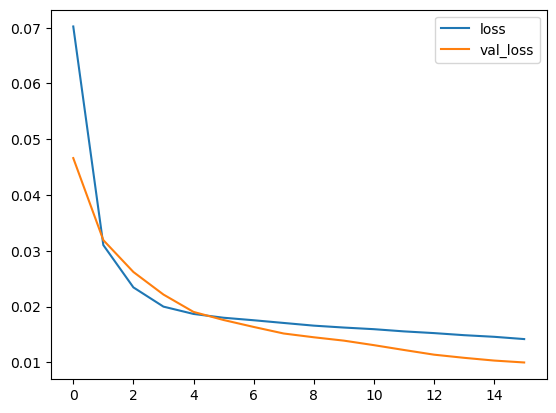

In [141]:
import seaborn as sns
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

## Calculate the adequate metrics

In [143]:
pred_y = model.predict(test_X)

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [145]:
pred_y = scaler.inverse_transform(pred_y)

In [147]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
(mean_absolute_error(test_y, pred_y), mean_squared_error(test_y, pred_y), r2_score(test_y, pred_y))

(3647.101375614966, 18689026.361795608, 0.4778670659957709)

## Visualize the targets against the predictions

<Axes: xlabel='TimePeriod'>

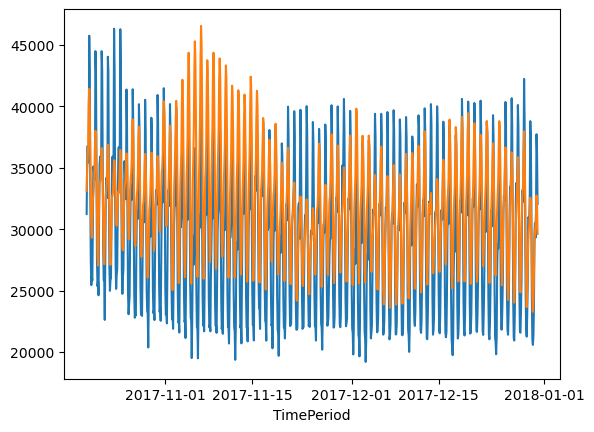

In [149]:
sns.lineplot(x=test_y.index, y=test_y.values)
sns.lineplot(x=test_y.index, y=pred_y.flatten())